In [18]:
%reset
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import scendict as sc
import utils as ut
import netCDF4 as nc
import xarray as xr
import numpy as np
from importlib import reload
reload(sc)
reload(ut)

import cartopy as cp
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import glob
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}

import time 
import pickle


import weighted
from matplotlib.cbook import violin_stats
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## daily windspeed

https://www.python-graph-gallery.com/ridgeline-graph-seaborn

In [20]:
w = nc.Dataset('/gpfs/home/mep22dku/scratch/MET_forcing/scen_1A/MetOffice_taux_y2100.nc')
#
w2 = '/gpfs/data/greenocean/software/resources/ERA5/Forcing/vflx.era.2020.daily.nc'

In [21]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
test_csize = tmesh.csize[0:37,:].values

In [22]:
uflx = (w['uflx'][:,0:37,:])


In [23]:
import seaborn as sns

In [24]:
print(np.shape(test_csize[10,:]))
#uflx on a given day
tu = uflx[100,10,:]
print(np.shape(tu))


(182,)
(182,)


In [ ]:
sns.kdeplot(data=tu.ravel(), x = 'uflx')

<AxesSubplot:ylabel='Density'>

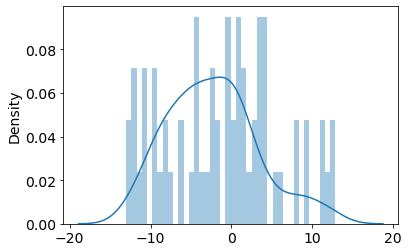

In [29]:
sns.distplot(tu.ravel(), bins=40, hist_kws={'weights':test_csize[10,:].ravel()}) 